# Trabajando con nuestros datos en Google Colaborate

## Cómo leer una hoja de cálculo en Google Colaborate

En este ejercicio usaremos un fichero o archivo de datos en formato CSV que habremos exportado previamente desde nuestra hoja de cálculo. Más adelante aprenderemos cómo leer directamente los datos de nuestras hojas Excel.

[Abrir cuaderno `02-analisis-queso.ipynb` en Google Colab/](https://colab.research.google.com/github/juanriera/master-queseria/blob/master/02-analisis-queso.ipynb)

[Descargar los datos de ejemplo `camembert.csv` usados en este cuaderno](https://raw.githubusercontent.com/juanriera/master-queseria/master/datos/camembert.csv')

### Opción 1: Subir los datos al espacio de trabajo de Google Colaborate

Los pasos son los mismos tanto si queremos trabajar con un `CSV`o directamente con una hoja Excel:
1. Seleccionamos el icono de carpeta a la izquierda, que nos abre la barra lateral de `Archivos`
2. Hacemos click sobre el icono de la hoja con la flecha vertical, lo que nos abre una ventana de selección de archivos.
3. Seleccionamos la hoja de cálculo o `CSV`con la que vamos a trabajar y la subimos al espacio de trabajo de Google Colaborate

Una vez la hoja de cálculo o el `CSV` en nuestro espacio de trabajo, procedemos a leer los datos.


El mayor inconveniente de esta forma de trabajo es que cada vez que salimos de la sesión, Google Colab borra todos nuestros archivos del espacio de trabajo; cada vez que iniciemos una sesión, tendremos que repetir el proceso de subir nuestros datos al espacio de trabajo. Por eso, la mejor opción es tener nuestros datos en una carpeta de Google Drive, que puede utilizarse desde Colab tal como vamos a ver a continuación.

### Opción 2: Leer directamente los datos de nuestra carpeta de Google Drive
Esta es una opción mucho más cómoda que nos evita los pasos intermedios, ya que no necesitamos subir la hoja de cálculo al espacio de trabajo.

Empezamos, como siempre, cargando las bibliotecas que nos proporcionan las funciones que vamos a utilizar durante el ejercicio. Aunque algunas no se usarán en la lectura de datos, en buenas prácticas es conveniente agrupar al principio del cuaderno todas las instrucciones de carga de bibliotecas en una misma celda.

In [1]:
import os
import pandas as pd             # manejo de dataframes y series
import matplotlib.pyplot as plt # funciones específicas de `matplotlib.pyplot`

import seaborn as sns
sns.set_style("whitegrid") # estilo de `seaborn` con fondo blanco

A continuación, la instrucciones para acceder a nuestro Google Drive y leer el archivo de datos.

In [2]:
#| eval: false

# 1. Ejecuta esta celda para montar tu Google Drive.
from google.colab import drive
drive.mount('/content/drive')

# 2. Verifica y ajusta esta ruta de archivo si es necesario:
google_drive_path_folder = '/content/drive/MyDrive/'
nombre_archivo_base = 'camembert.csv'
nombre_archivo_completo = os.path.join(google_drive_path_folder, nombre_archivo_base)

try:
    df = pd.read_csv(nombre_archivo_completo, decimal = ",", sep=';', encoding='ISO-8859-1')
    print("¡Archivo ", nombre_archivo_base," cargado correctamente!")
    print(f"Dimensiones de los datos: {df.shape}")
except Exception as e:
    print(f"Error al cargar el archivo: {e}")

### Explicación de los pasos:

#### 1. Montar Google Drive

```python
# 1. Ejecuta esta celda para montar tu Google Drive.
from google.colab import drive
drive.mount('/content/drive')
```

| Línea | Explicación |
|-------|------------|
| `from google.colab import drive` | Importa el módulo `drive` de Google Colab para acceder a Google Drive. |
| `drive.mount('/content/drive')` | Monta tu Google Drive en la ruta `/content/drive`. Te pedirá autorización la primera vez. |

---

#### 2. Definir ruta del archivo CSV

```python
# 2. Verifica y ajusta esta ruta de archivo si es necesario:
google_drive_path_folder = '/content/drive/MyDrive/'
nombre_archivo_base = 'camembert.csv'
nombre_archivo_completo = os.path.join(google_drive_path_folder, nombre_archivo_base)
```

| Línea | Explicación |
|-------|------------|
| `google_drive_path_folder = '/content/drive/MyDrive/'` | Ruta donde está el archivo dentro de Google Drive. |
| `nombre_archivo_base = 'camembert.csv'` | Nombre del archivo CSV que se quiere cargar. |
| `os.path.join(...)` | Une la ruta y el nombre del archivo para formar la ruta completa. Evita errores en distintos sistemas operativos. |

---

#### 3. Cargar el archivo CSV con pandas

```python
try:
    df = pd.read_csv(nombre_archivo_completo, decimal = ",", sep=';', encoding='ISO-8859-1')
    print("¡Archivo ", nombre_archivo_base," cargado correctamente!")
    print(f"Dimensiones de los datos: {df.shape}")
except Exception as e:
    print(f"Error al cargar el archivo: {e}")
```

| Línea | Explicación |
|-------|------------|
| `try:` | Inicia un bloque que intenta ejecutar el código. Si hay error, pasa al bloque `except`. |
| `pd.read_csv(...)` | Carga el archivo CSV como un DataFrame de pandas. Parámetros: |
| &nbsp;&nbsp;&nbsp;&nbsp;`decimal=","` | Indica que los decimales usan coma (formato europeo). |
| &nbsp;&nbsp;&nbsp;&nbsp;`sep=";"` | Indica que los campos están separados por punto y coma. |
| &nbsp;&nbsp;&nbsp;&nbsp;`encoding="ISO-8859-1"` | Codificación para leer caracteres especiales como tildes. |
| `print(...)` | Muestra mensaje de éxito si el archivo se carga correctamente. |
| `df.shape` | Devuelve número de filas y columnas del DataFrame. |
| `except Exception as e:` | Captura cualquier error que ocurra al cargar el archivo. |
| `print(f"Error...")` | Muestra el mensaje de error en pantalla. |




En `Python` siempre se prefiere encapsular la instrucción en una estructura `try...except`, que maneja los posibles errores o **excepciones** que pueden producirse en la lectura, por ejemplo, que nuestro *path* sea incorrecto, o que hayamos escrito mal el nombre del fichero, o cualquier otro error que haga que la instruccion de lectura falle. Añadimos también algunas instrucciones de `print()` que nos ayuden a saber que todo ha ido bien (o mal).

En este cuaderno vamos a cargar los datos desde GitHub; estos datos pueden ser descargados en el ordenador o Google Drive de cada uno, junto con el cuaderno, en los enlaces facilitados al principio. Una vez en Drive, puede prácticarse la alternativa anterior para leerlos directamente.

Como ya hemos cargado las bibliotecas necesarias en el primer bloque, procedemos directamente a la lectura de los datos

In [3]:
url_datos = 'https://raw.githubusercontent.com/juanriera/master-queseria/master/datos/camembert.csv'

try:
    df = pd.read_csv(url_datos, decimal = ",", sep=';', encoding='ISO-8859-1')
    print("¡Archivo ", url_datos," cargado correctamente!")
    print(f"Dimensiones de los datos: {df.shape}")
except Exception as e:
    print(f"Error al cargar el archivo: {e}")

¡Archivo  https://raw.githubusercontent.com/juanriera/master-queseria/master/datos/camembert.csv  cargado correctamente!
Dimensiones de los datos: (211, 7)


Podemos mostrar el `dataframe` que hemos leído, mediante la funcion `.head()`, que nos muestra las cinco primeras lineas.

In [4]:
df.head()

,fecha,fabricacion,est,mg,ph,cloruros,coliformes
0,11/01/2020,1,46.68,24.0,4.85,1.50,80.0
1,12/01/2020,1,48.09,25.0,4.67,1.61,0.0
2,13/01/2020,1,45.97,24.0,4.71,1.48,9200.0
3,14/01/2020,1,46.24,23.5,4.78,1.69,20.0
4,15/01/2020,1,45.81,23.0,4.77,1.56,150.0


Vemos que el nombre de la columna `fecha` está colocada en una línea inferior respecto a los otros nombres de columna. Esto se debe a que la hemos designado como `ìndex`, y, por lo tanto, ya no es una columna ordinaria para `pandas` (podemos volver a convertirla en columna normal o de texto en cualquier momento según nuestros intereses, como veremos más adelante).

También podemos usar la función `.info()`, que nos dice la estructura interna de nuestro `dataframe` y el tipo de los datos (entero, numérico, carácter...). Dado que la fecha, como hemos visto, está formateada como fecha y asignada como `ìndex`, ya no aparece en el listado de columnas de datos, sino que aparece en la primera línea como `DateTimeIndex`, y la informacion nos dice los límites de esas fechas.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fecha        211 non-null    object 
 1   fabricacion  211 non-null    int64  
 2   est          211 non-null    float64
 3   mg           211 non-null    float64
 4   ph           211 non-null    float64
 5   cloruros     211 non-null    float64
 6   coliformes   210 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 11.7+ KB


## Introducción a los gráficos básicos

Una vez leído correctamente el `DataFrame`, podemos hacer algunos gráficos de sus columnas numéricas. También usaremos las funciones de `seaborn` que producen salidas muy atractivas y son funcionjes fáciles de manejar.

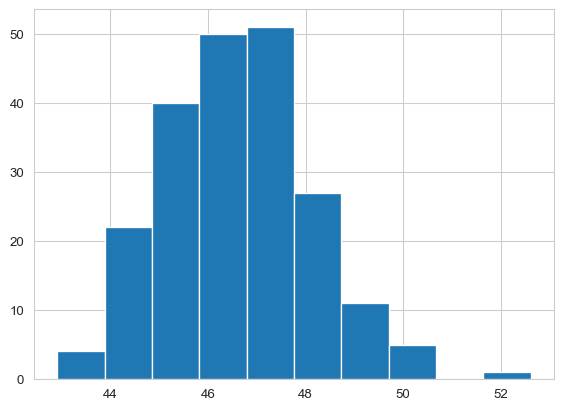

In [6]:
df["est"].hist() # histograma bássico de matplotlib

plt.show()

Fíjate en la forma correcta de designar una columna en un `DataFrame`de pandas, usando su nombre.

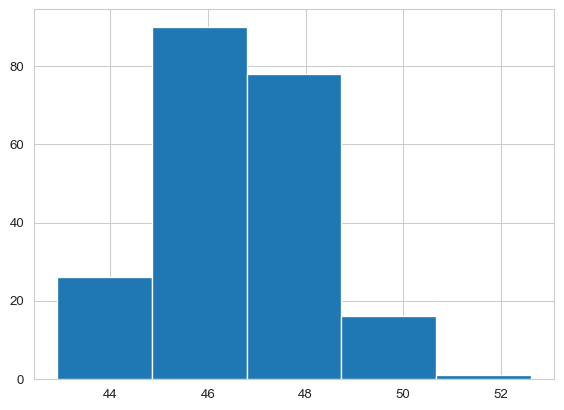

In [7]:
df["est"].hist(bins = 5)

plt.show()

Vamos a repetir el histograma con `seaborn`, que nos permite incluir una **curva de densidad** fácilmente (pregunta: ¿qué es una curva de densidad?)

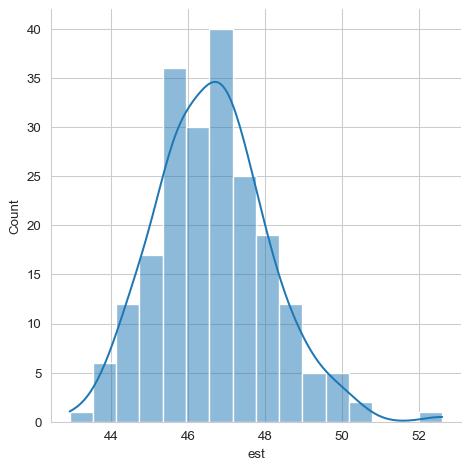

In [8]:
sns.displot(df["est"], kde = True)

plt.show()

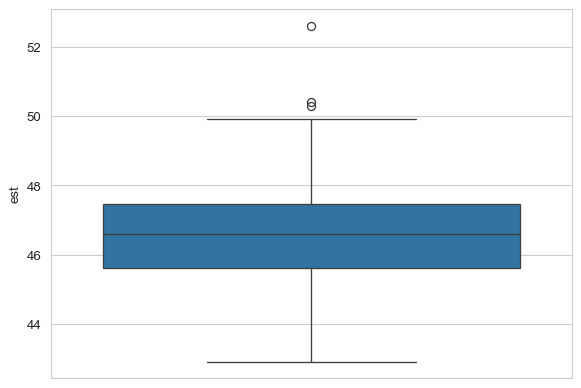

In [9]:
sns.boxplot(df['est'])

plt.show()

Aquí puedes ver la potencia de `pandas`para manejar y agrupar las series. Para representar los datos por mes, sólo tenemos que crear una nueva columna `mes` indicando a `pandas` que extraiga del índice la parte de fecha que corresponde al mes. ¿Fácil, no?

In [10]:
df['fecha_index']= pd.DatetimeIndex(df.fecha).normalize()
df.set_index('fecha_index',inplace=True)
df.sort_index(inplace=True)

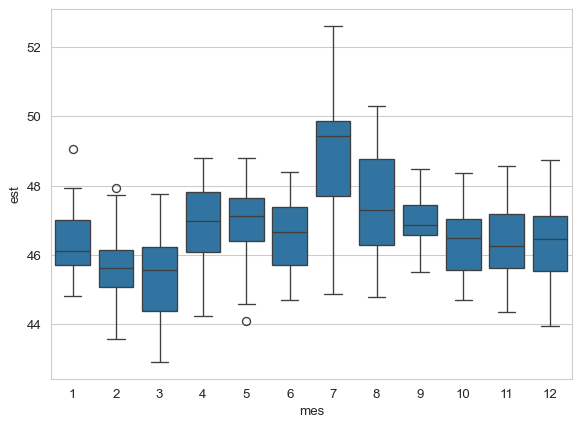

In [11]:
df['mes'] = df.index.month
sns.boxplot(x='mes', y='est', data=df)

plt.show()

En vez de usar el número para el mes, podemos usar el código de letras abreviado (en este caso, `seaborn`utiliza la abreviatura en inglés, pero hemos cambiado la codificación para que lo represente en español, en la instruccion `locale` que hemos usado en la primera casilla). Aprovechamos para personalizar un poco el gráfico.

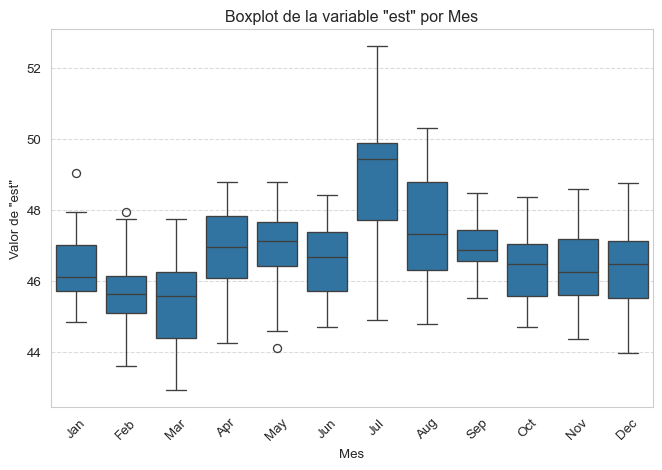

In [12]:
df['mes_abreviado'] = df.index.strftime('%b')
sns.boxplot(x='mes_abreviado', y='est', data=df)
# Opcional: Personalizar el gráfico
plt.title('Boxplot de la variable "est" por Mes')
plt.xlabel('Mes')
plt.ylabel('Valor de "est"')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadir una cuadrícula para mejor lectura
plt.xticks(rotation=45) # Rotar las etiquetas del eje X si son muchas
plt.tight_layout() # Ajusta automáticamente los parámetros de la subtrama para un diseño ajustado

plt.show()


### Introducción a los gráficos de series temporales

Para utilizar las funciones de series de `pandas` resulta conveniente convertir en una columna de fecha la primera columna, que `pandas` ha leido como texto, y asignarla como `index` del dataframe; el formateo de series temporales en esta biblioteca es uno de sus puntos más fuertes.

In [13]:
df['fecha_index']= pd.DatetimeIndex(df.fecha).normalize()
df.set_index('fecha_index',inplace=True)
df.sort_index(inplace=True)

La función `.plot()` nos representa los valores de la columna en orden secuencial:

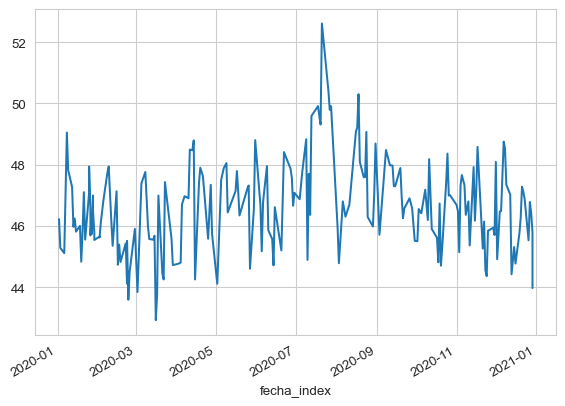

In [14]:
df["est"].plot()
plt.show()

Si utilizamos las funciones de `pandas`, podemos reformatear las fechas como serie temporal. Creamos una serie temporal y la remuestreamos para hacer las medias semanales del extracto seco total, eliminando las semans en las que no hay valores con `.dropna()`. La función `resample('W-MON')` formatea las fechas para que las semanas empiecen en lunes, como es el caso en Europa (en USA la semana empieza el domingo). Aprovechamos para mostrar una de las potencias de `Python`: podemos hacer que varios cálculos se hagan a continuacion de los otros, simplemente enlazando las funciones, hasta el `.plot()`

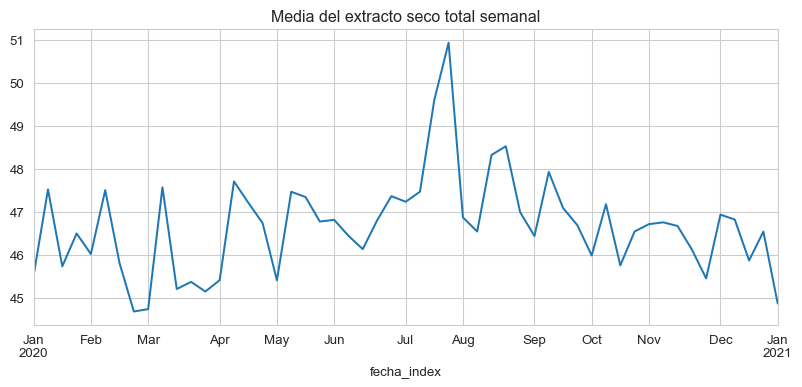

In [15]:
plt.rcParams['figure.figsize'] = (10.0,4.0)
ts = pd.Series(df["est"].dropna())
ts.resample('W-MON').mean().plot(title="Media del extracto seco total semanal")
plt.show()

Veamos a continuación otras formas de formatear la serie sobre la marcha, pero esta vez representando la `desviación típica`en vez de la `media`.

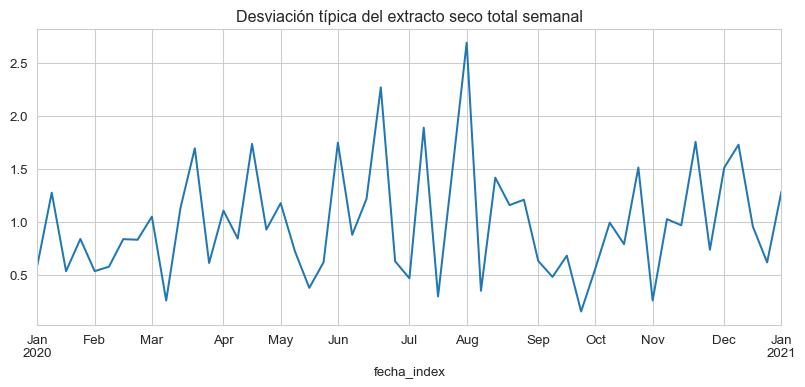

In [16]:
ts.resample('W-MON').std().plot(title="Desviación típica del extracto seco total semanal");

O podemos representar un período específico de la serie indicando a `pandas` los límites inferior y superior de las fechas que queremos.

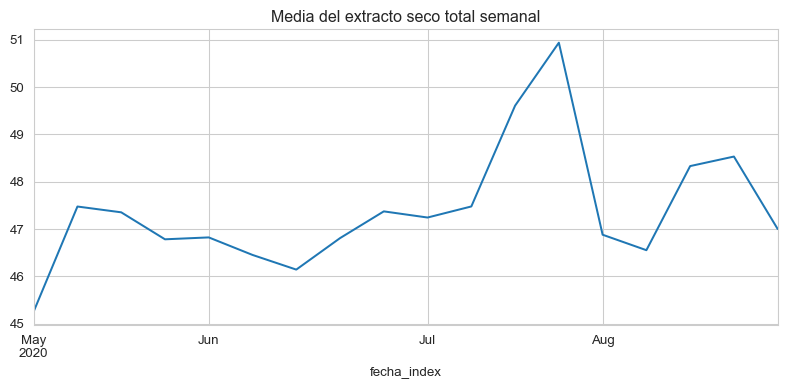

In [17]:
ts["2020-05":"2020-08"].resample('W-MON').mean().plot(title="Media del extracto seco total semanal");

A modo ilustrativo, aunque sin un interés prioritario, muestro un grafico `jointplot()` de `seaborn` que muestra la facilidad con la que esta biblioteca puede hacer un gráfico complejo de dispersión e histograma simultáneamente.

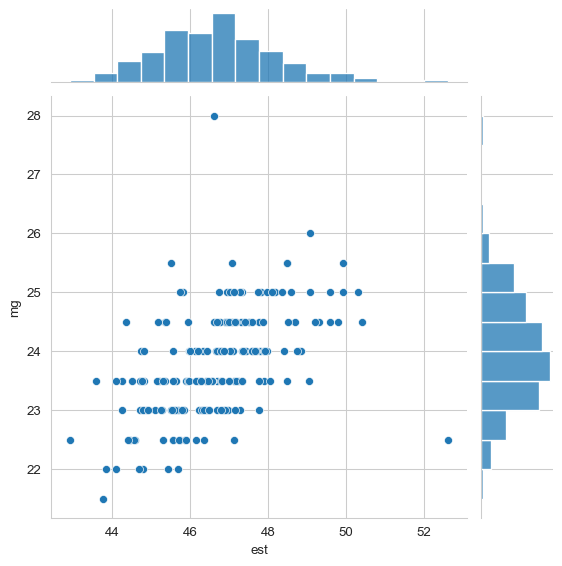

In [18]:
sns.jointplot(x="est", y="mg", data = df[~df.index.duplicated(keep='first')])

Una alternativa más moderna a los `boxplots` son los llamados `violin plots`, que tienenla ventaja sobrelos primeros de mostrar la curva de distribución de los datos.

<Axes: xlabel='fecha_index', ylabel='est'>

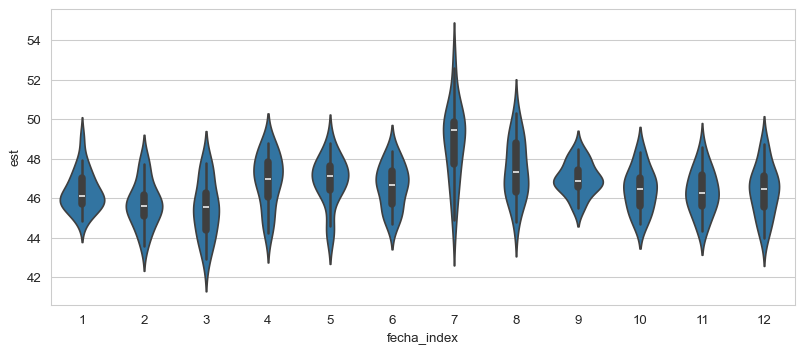

In [19]:
sns.violinplot(y=df["est"], x=df.index.month)

Finalmente, una serie de cálculos más complejos para obtener los gráficos de capacidad de un proceso, como muestra de cómo se pueden usar las funciones y gráficos de `Python` para prácticamente cualquier necesidad.

A continuación, una serie de celdas que realizan gráficos diversos, puedes dedicar un rato a estudiarlas e intentar comprender bien su programación.

In [20]:
limite_rechazo = 231    ##
limite_deficientes = 242    ##

LSL = df.est.mean() - 3 * df.est.std()    ## lower specification limit
USL = df.est.mean() + 3 * df.est.std()    ## upper specification limit

df.insert(6,'LSL', LSL)
df.insert(7,'USL', USL)


In [21]:
df['fecha'] = df.index

In [22]:
df.head()

,fecha,fabricacion,est,mg,ph,cloruros,LSL,USL,coliformes,mes,mes_abreviado
fecha_index,,,,,,,,,,,
2020-01-02,2020-01-02,1,46.22,23.0,4.61,1.88,42.279767,50.994641,0.0,1,Jan
2020-01-03,2020-01-03,1,45.28,23.0,4.78,1.62,42.279767,50.994641,0.0,1,Jan
2020-01-06,2020-01-06,1,45.11,23.0,4.72,1.69,42.279767,50.994641,2000.0,1,Jan
2020-01-08,2020-01-08,1,49.05,23.5,4.68,1.65,42.279767,50.994641,6000.0,1,Jan
2020-01-09,2020-01-09,1,47.82,25.0,4.66,1.37,42.279767,50.994641,100.0,1,Jan


In [23]:
df2 = pd.melt(df, id_vars= ['fecha'], value_vars=["est","LSL", "USL"],  value_name="valores")

In [24]:
df2.head()

,fecha,variable,valores
0,2020-01-02,est,46.22
1,2020-01-03,est,45.28
2,2020-01-06,est,45.11
3,2020-01-08,est,49.05
4,2020-01-09,est,47.82


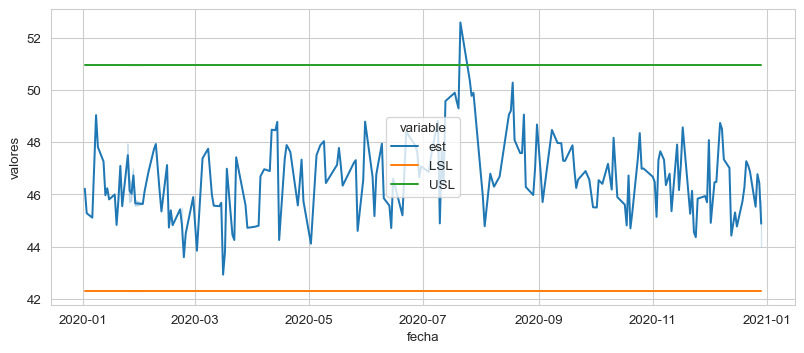

In [25]:
plt.rcParams['figure.figsize'] = (10.0,4.0)
g = sns.lineplot(data=df2, x="fecha", y="valores", hue="variable")

In [26]:
df3 = df2.groupby([df2['fecha'].dt.isocalendar().week, "variable"]).mean()

In [27]:
df3.reset_index(inplace=True)

In [28]:
df3.head()

,week,variable,fecha,valores
0,1,LSL,2020-01-02 12:00:00,42.279767
1,1,USL,2020-01-02 12:00:00,50.994641
2,1,est,2020-01-02 12:00:00,45.750000
3,2,LSL,2020-01-08 18:00:00,42.279767
4,2,USL,2020-01-08 18:00:00,50.994641


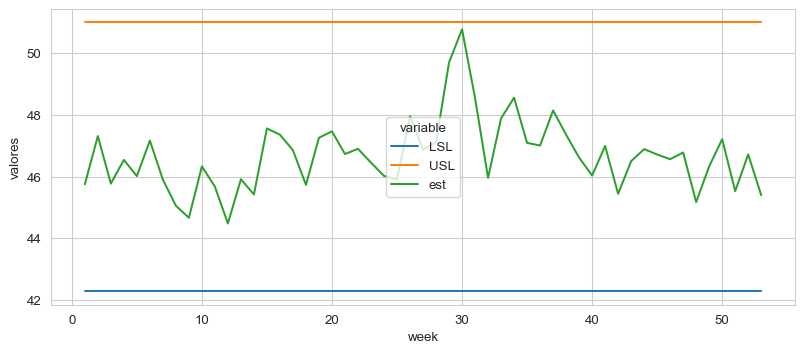

In [29]:
plt.rcParams['figure.figsize'] = (10.0,4.0)
sns.set_style("whitegrid")
g = sns.lineplot(data=df3, x="week", y="valores", hue="variable")

In [30]:
df2 = df.copy()
df.drop(['fabricacion','mg', 'cloruros','coliformes'], axis=1, inplace = True)

In [31]:
df2 = df2['est'].groupby(df['fecha'].dt.isocalendar().week).agg(['mean','std'])

In [32]:
df2.head()

,mean,std
week,,
1,45.7500,0.664680
2,47.3125,1.646134
3,45.7700,0.547494
4,46.5400,0.893476
5,46.0150,0.522986


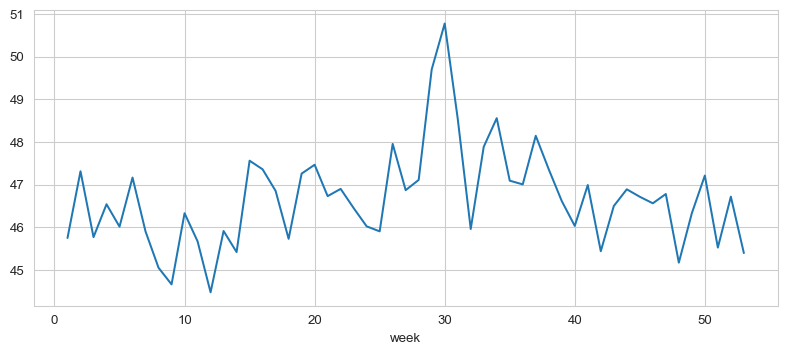

In [33]:
df2['mean'].plot();

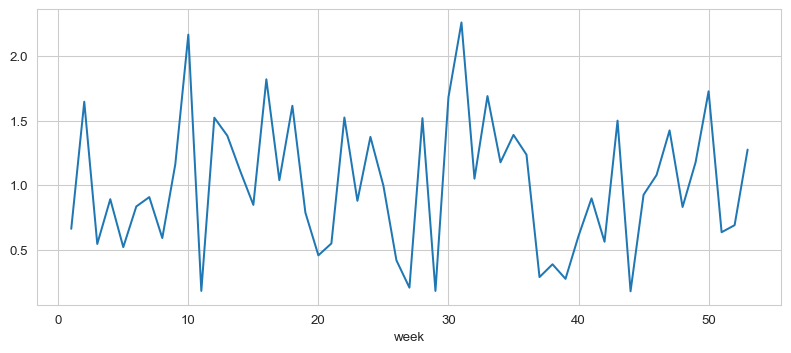

In [34]:
df2['std'].plot();

In [35]:
LSL = df2['mean'] - 3 * df2['std']    ## lower specification limit
USL = df2['mean'] + 3 * df2['std']    ## upper specification limit

df2.insert(2,'LSL', LSL)
df2.insert(3,'USL', USL)

# limite_rechazo = 231    ##
# limite_deficientes = 242    ##
# df3.insert(5,'rechazo', limite_rechazo)
# df3.insert(6,'deficientes', limite_deficientes)


In [36]:
df2.head()

,mean,std,LSL,USL
week,,,,
1,45.7500,0.664680,43.755959,47.744041
2,47.3125,1.646134,42.374097,52.250903
3,45.7700,0.547494,44.127517,47.412483
4,46.5400,0.893476,43.859571,49.220429
5,46.0150,0.522986,44.446042,47.583958


In [37]:
df2['semana'] = df2.index # necesitamos la semana en una columna de valor
df3 = pd.melt(df2, id_vars= ['semana'], value_vars=["mean","LSL", "USL"],  value_name="valores")

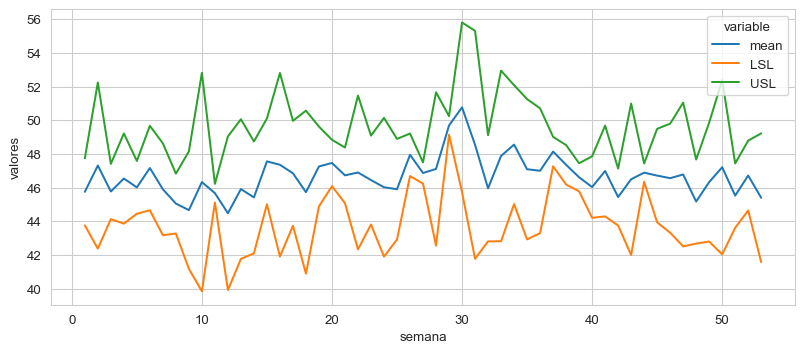

In [38]:
g = sns.lineplot(data=df3, x="semana", y="valores", hue="variable")